Dice Rolls = 2, Experiments = 100, Mean = 7.14, Variance = 5.94


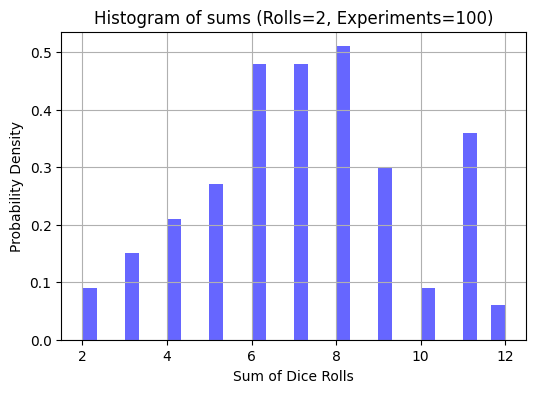

Dice Rolls = 2, Experiments = 500, Mean = 6.96, Variance = 6.09


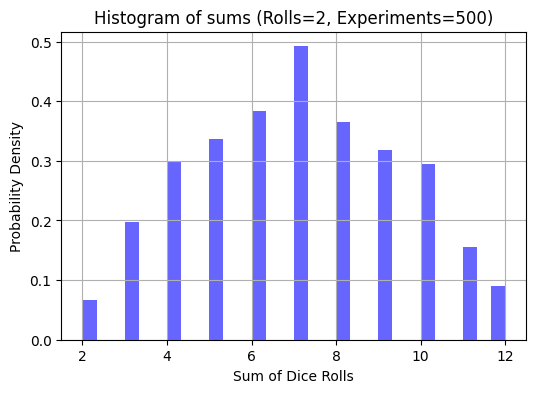

Dice Rolls = 2, Experiments = 1000, Mean = 7.28, Variance = 5.51


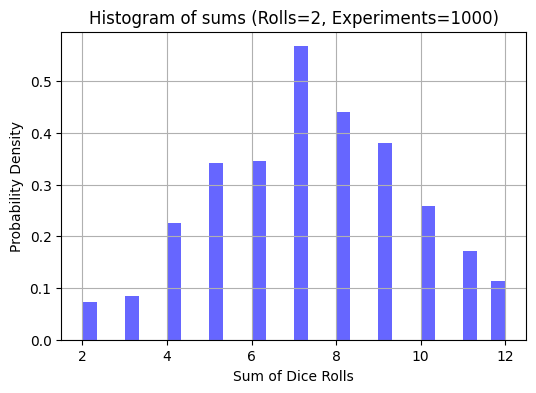

Dice Rolls = 2, Experiments = 5000, Mean = 6.96, Variance = 5.79


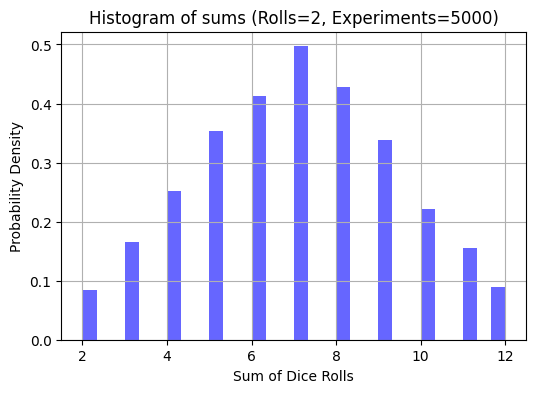

Dice Rolls = 2, Experiments = 10000, Mean = 6.96, Variance = 5.76


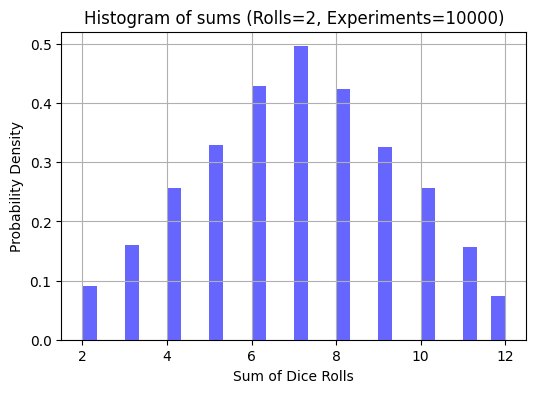

Dice Rolls = 2, Experiments = 50000, Mean = 7.00, Variance = 5.87


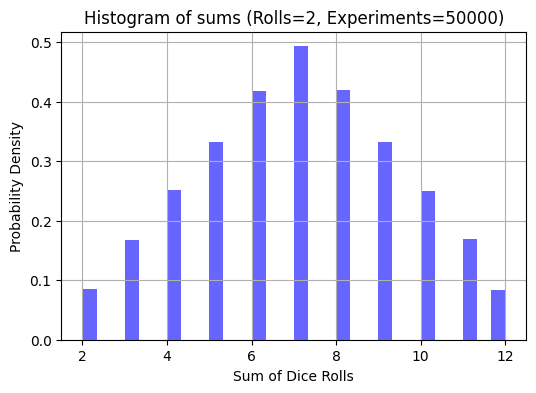

Dice Rolls = 2, Experiments = 100000, Mean = 6.99, Variance = 5.85


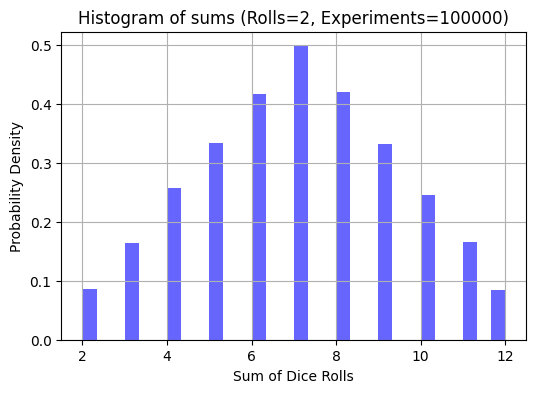

Dice Rolls = 3, Experiments = 100, Mean = 10.47, Variance = 7.51


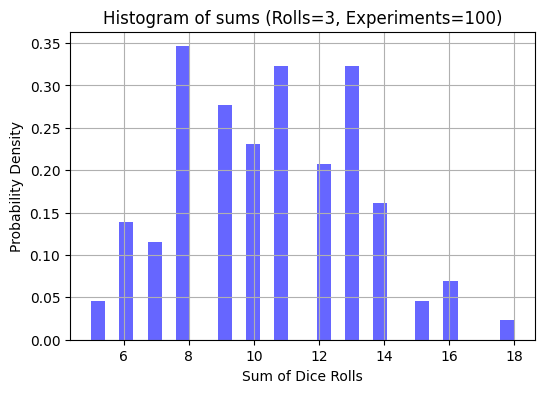

Dice Rolls = 3, Experiments = 500, Mean = 10.52, Variance = 9.28


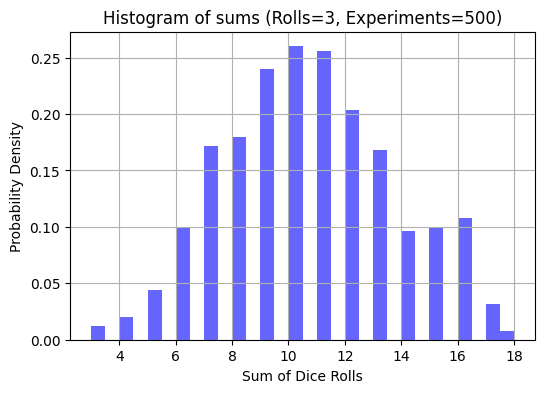

Dice Rolls = 3, Experiments = 1000, Mean = 10.65, Variance = 8.98


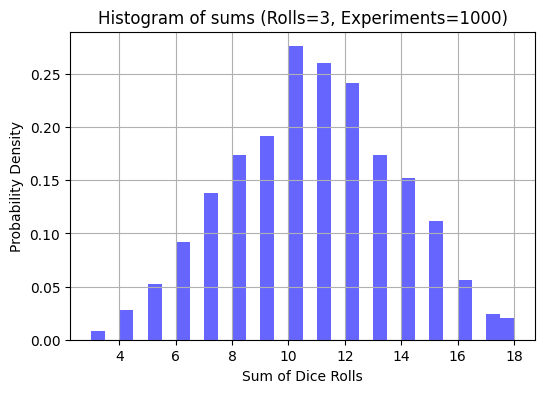

Dice Rolls = 3, Experiments = 5000, Mean = 10.52, Variance = 8.65


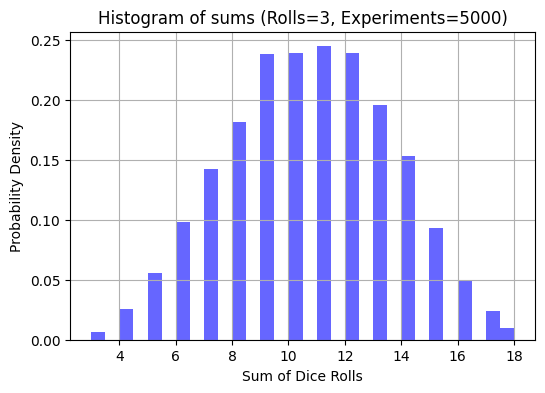

Dice Rolls = 3, Experiments = 10000, Mean = 10.52, Variance = 8.66


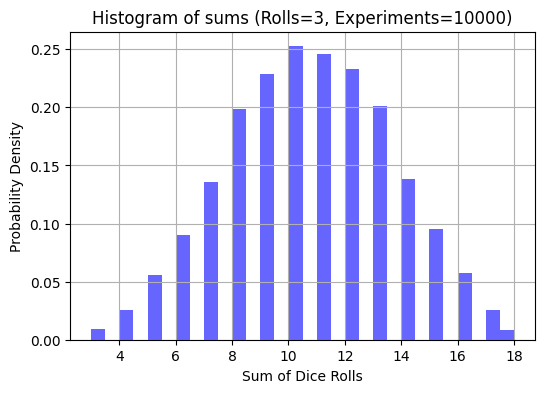

Dice Rolls = 3, Experiments = 50000, Mean = 10.51, Variance = 8.76


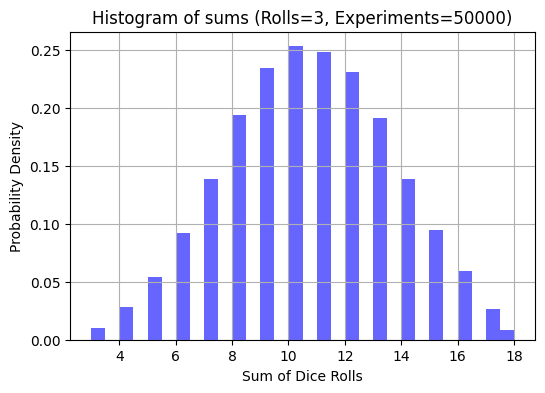

Dice Rolls = 3, Experiments = 100000, Mean = 10.48, Variance = 8.76


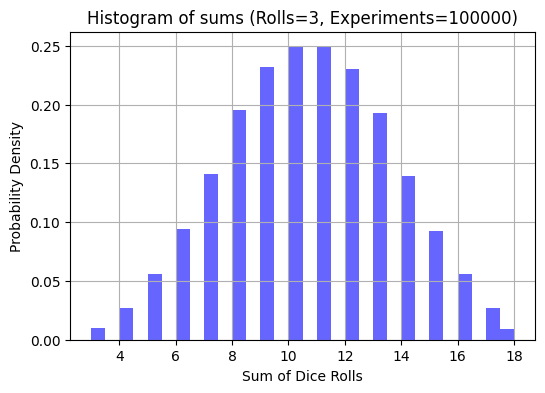

Dice Rolls = 5, Experiments = 100, Mean = 16.95, Variance = 16.01


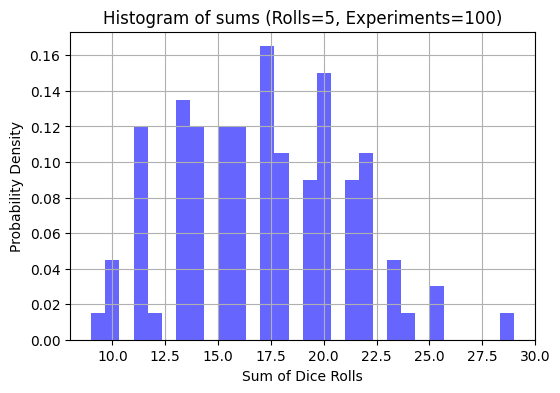

Dice Rolls = 5, Experiments = 500, Mean = 17.34, Variance = 14.60


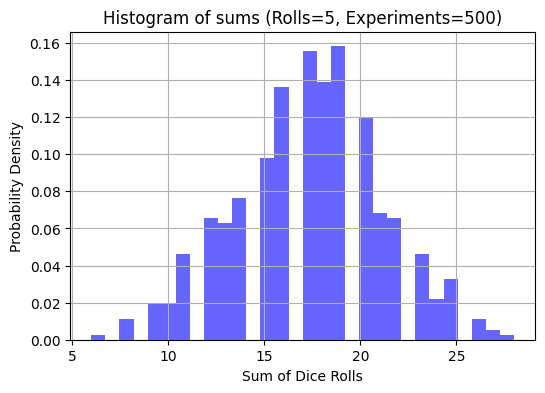

Dice Rolls = 5, Experiments = 1000, Mean = 17.39, Variance = 14.77


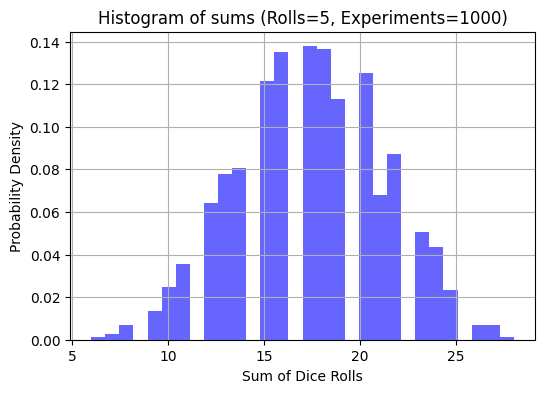

Dice Rolls = 5, Experiments = 5000, Mean = 17.50, Variance = 14.65


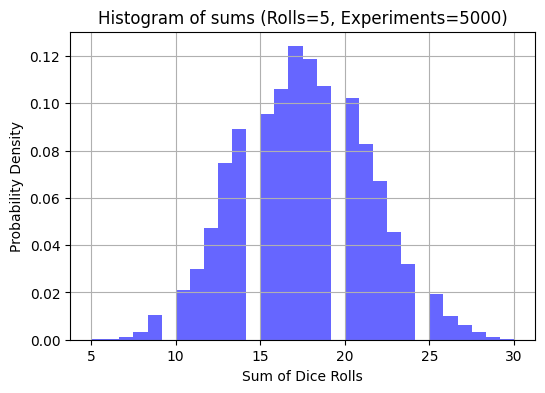

Dice Rolls = 5, Experiments = 10000, Mean = 17.55, Variance = 14.73


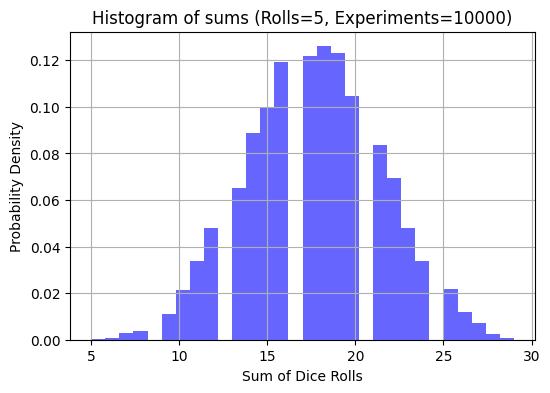

Dice Rolls = 5, Experiments = 50000, Mean = 17.51, Variance = 14.43


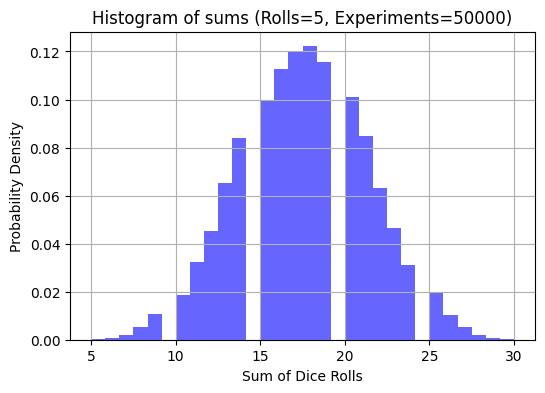

Dice Rolls = 5, Experiments = 100000, Mean = 17.52, Variance = 14.60


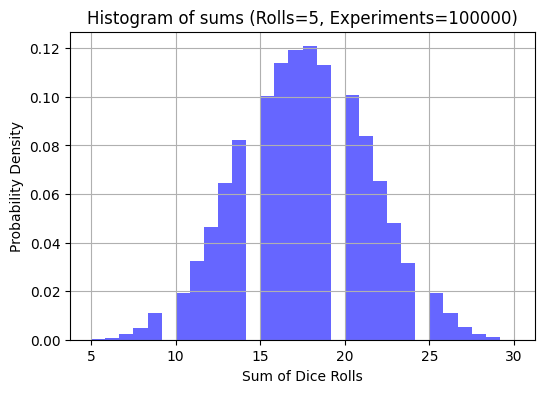

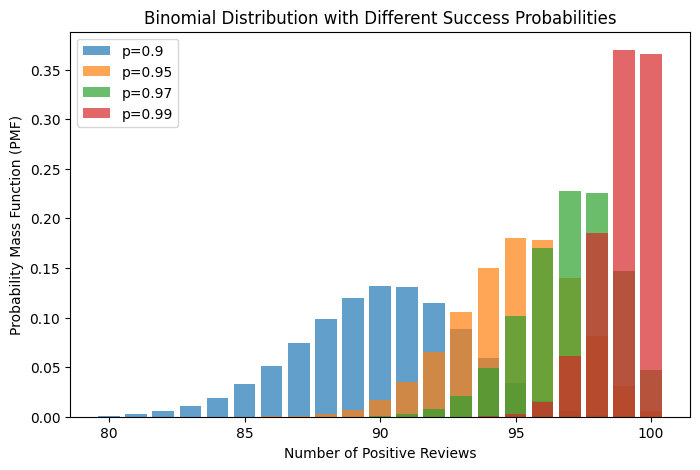

Estimated success rate (MLE) = 0.97

Dataset: Advertising
Column: TV, Entropy: 3.2985
Column: Radio, Entropy: 3.2896
Column: Newspaper, Entropy: 2.7522
Column: Sales, Entropy: 3.0530

Dataset: Housing
Column: price, Entropy: 2.5584
Column: area, Entropy: 2.4166
Column: bedrooms, Entropy: 1.5784
Column: bathrooms, Entropy: 0.9448
Column: stories, Entropy: 1.6013
Column: mainroad, Entropy: 0.5876
Column: guestroom, Entropy: 0.6756
Column: basement, Entropy: 0.9345
Column: hotwaterheating, Entropy: 0.2686
Column: airconditioning, Entropy: 0.8995
Column: parking, Entropy: 1.5476
Column: prefarea, Entropy: 0.7864
Column: furnishingstatus, Entropy: 1.5573

Dataset: FAA
Column: UPDATED, Entropy: 0.2243
Column: ENTRY_DATE, Entropy: 2.7897
Column: EVENT_LCL_DATE, Entropy: 3.8502
Column: EVENT_LCL_TIME, Entropy: 6.1973
Column: LOC_CITY_NAME, Entropy: 6.2787
Column: LOC_STATE_NAME, Entropy: 4.3330
Column: LOC_CNTRY_NAME, Entropy: 0.0000
Column: RMK_TEXT, Entropy: 6.3268
Column: EVENT_TYPE_DESC, E

In [ ]:


import sys
import subprocess

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for pkg in ["numpy", "matplotlib", "scipy", "pandas"]:
    try:
        __import__(pkg)
    except ImportError:
        install(pkg)

# =============================
# Question 1: Dice Rolling Simulation
# =============================

import numpy as np
import matplotlib.pyplot as plt

# Function to simulate dice rolls and collect sums
def dice_simulation(num_rolls, num_experiments):
    """
    num_rolls: number of dice rolls per experiment (1 to 50)
    num_experiments: number of times the experiment is repeated
    returns: array of sums of dice rolls
    """
    rolls = np.random.randint(1, 7, size=(num_experiments, num_rolls))  # simulate dice rolls
    sums = rolls.sum(axis=1)  # sum across each experiment
    return sums

# Experiment sizes
experiment_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]

# Run for different number of dice rolls (e.g., 2, 3, 5)
for num_rolls in [2, 3, 5]:
    for size in experiment_sizes:
        sums = dice_simulation(num_rolls, size)
        mean, var = np.mean(sums), np.var(sums)
        print(f"Dice Rolls = {num_rolls}, Experiments = {size}, Mean = {mean:.2f}, Variance = {var:.2f}")

        # Plot histogram
        plt.figure(figsize=(6,4))
        plt.hist(sums, bins=30, density=True, alpha=0.6, color='b')
        plt.title(f"Histogram of sums (Rolls={num_rolls}, Experiments={size})")
        plt.xlabel("Sum of Dice Rolls")
        plt.ylabel("Probability Density")
        plt.grid(True)
        plt.show()

# =============================
# Question 2: Binomial Distribution
# =============================

from scipy.stats import binom

n = 100  # number of trials (reviews)
k = 97   # number of successes (positive reviews)

# Different assumed probabilities of success
p_values = [0.90, 0.95, 0.97, 0.99]

x = np.arange(80, 101)  # possible number of successes from 80 to 100

plt.figure(figsize=(8,5))
for p in p_values:
    probs = binom.pmf(x, n, p)
    plt.bar(x, probs, alpha=0.7, label=f"p={p}")

plt.title("Binomial Distribution with Different Success Probabilities")
plt.xlabel("Number of Positive Reviews")
plt.ylabel("Probability Mass Function (PMF)")
plt.legend()
plt.show()

# MLE estimate of p
p_hat = k / n
print(f"Estimated success rate (MLE) = {p_hat:.2f}")

# =============================
# Question 3: Entropy of Dataset Columns
# =============================

import pandas as pd
from scipy.stats import entropy

# Load datasets (adjust paths if needed for your machine)
adv = pd.read_csv("advertising.csv")
house = pd.read_csv("Housing.csv")
faa = pd.read_csv("faa.csv")

datasets = {"Advertising": adv, "Housing": house, "FAA": faa}

# Function to calculate entropy of a column
def column_entropy(series, bins=10):
    if series.dtype == 'object' or series.dtype == 'bool':  # categorical
        counts = series.value_counts(normalize=True)
    else:  # continuous → binning
        counts, _ = np.histogram(series.dropna(), bins=bins)
        counts = counts / counts.sum() if counts.sum() > 0 else counts
    return entropy(counts, base=2)

# Calculate entropy for each dataset
for name, df in datasets.items():
    print(f"\nDataset: {name}")
    for col in df.columns:
        try:
            ent = column_entropy(df[col])
            print(f"Column: {col}, Entropy: {ent:.4f}")
        except Exception as e:
            print(f"Column: {col}, skipped due to error: {e}")


#             More dice → sums look more like a bell curve (normal distribution) due to Central Limit Theorem.

# Larger experiments → smoother and more accurate histogram.
